## collecting data

In this notebook I will create a data set about movies from a base at filmweb.pl using a BeautifulSoup and try to predict a rating of movies.

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
#function getting information about 1 film

def get_info(link):
    
    r=requests.get(link)
    soup=bs(r.content)

    movie_info={}
    
    #info about directors,...,premiere 
    info_box=soup.find(class_='filmPosterSection__info filmInfo')

    keys=info_box.find_all(class_='filmInfo__header')
    values=info_box.find_all(class_='filmInfo__info')

    for i in range(5):
        key=keys[i].get_text(strip=True).split('(')[0]
        value=values[i].get_text(strip=True).split('(')[0]
        movie_info[key]=value
        
    #info about title and actors
    for i in range(10):
        try:
            base_link='https://www.filmweb.pl'
            actors_link=base_link+soup.find_all(class_='page__moreButton')[i].a['href']

            r2=requests.get(actors_link)
            soup2=bs(r2.content)

            movie_info['title']=soup2.find(class_='filmHeaderSection__title').get_text(strip=True)

            actors_table=soup2.find(class_='filmFullCastSection__list')
            actors_rows=actors_table.find_all(class_='castRoleListElement__info')
            movie_info['actors']=[]

            for index, row in enumerate(actors_rows):
                actor_name=row.a.get_text(strip=True)
                movie_info['actors'].append(actor_name)
                if index>10:
                    break
        except:
            continue

    #info about boxoffice,..., oryginal title
    info_box3=soup.find(class_='filmOtherInfoSection__group')
    info_rows3=info_box3.find_all(class_='filmInfo__group')

    for index, row in enumerate(info_rows3):
        if index<5:
            keys=row.find_all(class_='filmInfo__header')
            values=row.find_all(class_='filmInfo__info')
            for i in range(2):
                try:
                    key2=keys[i].get_text(strip=True).split('(')[0]
                    value2=values[i].get_text(strip=True).split('(')[0]
                    movie_info[key2]=value2
                except:
                    continue
        else:
            break
    
    #info about rating
    movie_info['rating']=soup.find(class_='filmRating__rateValue').get_text(strip=True)
            
    return movie_info

We will use link: https://www.filmweb.pl/films/search?endRate=9&orderBy=rate&descending=true&startCount=8000&startRate=8, and get information about movies with rates from 3.9 to 8.9 stars.

In [4]:
movies_info_list=[]

for l in range(6):
    print(l)
    k=10 #setting number of pages
    j=3+l

    for i in range(k):
        link='https://www.filmweb.pl/films/search?endRate={}'.format(j+1)+'&orderBy=rate&descending=true&startCount=8000'+'&startRate={}'.format(j)+'&page={}'.format(i+1)
        
        print(link)  #to follow a progress of loading
        r=requests.get(link)
        soup=bs(r.content)
        film_list=soup.select('.wrapperContent.page__section')
        film_rows=film_list[0].find_all('li')

        for index, row in enumerate(film_rows):
            if index<80:
                try:
                    base_link='https://www.filmweb.pl'
                    link=base_link+row.find(class_='filmPreview__titleDetails').a['href']
                    print(link)  #to follow a progress of loading
                    movies_info_list.append(get_info(link))
                except:
                    continue

    
movies_info_list

0
https://www.filmweb.pl/films/search?endRate=4&orderBy=rate&descending=true&startCount=8000&startRate=3&page=1
https://www.filmweb.pl/film/Droga+bez+powrotu+6%3A+Hotel+na+uboczu-2014-723517
https://www.filmweb.pl/film/Fighter-2019-831129
https://www.filmweb.pl/film/Wied%C5%BAmin-2001-1281
https://www.filmweb.pl/film/Z%C4%99by-2007-378102
https://www.filmweb.pl/film/Pi%C4%99%C4%87dziesi%C4%85t+twarzy+Blacka-2016-746820
https://www.filmweb.pl/film/365+dni-2020-842452
https://www.filmweb.pl/film/%5BRec%5D+3%3A+Geneza-2012-544033
https://www.filmweb.pl/film/BloodRayne-2005-116496
https://www.filmweb.pl/film/Escape+Room-2017-796989
https://www.filmweb.pl/film/Czasy+ostateczne%3A+Pozostawieni-2014-670711
https://www.filmweb.pl/films/search?endRate=4&orderBy=rate&descending=true&startCount=8000&startRate=3&page=2
https://www.filmweb.pl/film/Pirania+3DD-2012-597319
https://www.filmweb.pl/film/Justin+Bieber%3A+Never+Say+Never-2011-593915
https://www.filmweb.pl/film/Wyjazd+integracyjny-2011-601

https://www.filmweb.pl/film/%5BREC%5D+4%3A+Apokalipsa-2014-567829
https://www.filmweb.pl/film/9+Songs-2004-139132
https://www.filmweb.pl/film/Duchy+Marsa-2001-5825
https://www.filmweb.pl/film/IO-2019-816986
https://www.filmweb.pl/film/S%40motno%C5%9B%C4%87+w+sieci-2006-195202
https://www.filmweb.pl/film/Jak+z%C5%82ama%C4%87+10+przykaza%C5%84-2007-338798
https://www.filmweb.pl/film/Alex+-+sam+w+domu-1997-506
https://www.filmweb.pl/film/Poltergeist-2015-266532
https://www.filmweb.pl/film/Kto+tam-2015-713093
https://www.filmweb.pl/film/Hans+Kloss.+Stawka+wi%C4%99ksza+ni%C5%BC+%C5%9Bmier%C4%87-2012-623521
https://www.filmweb.pl/films/search?endRate=5&orderBy=rate&descending=true&startCount=8000&startRate=4&page=10
https://www.filmweb.pl/film/Z%C5%82oty+%C5%9Brodek-2009-490961
https://www.filmweb.pl/film/Polowanie+na+prezydenta-2014-690764
https://www.filmweb.pl/film/Pech+to+nie+grzech-2018-811026
https://www.filmweb.pl/film/Prawdziwa+historia+Kota+w+Butach-2009-494957
https://www.filmweb.p

3
https://www.filmweb.pl/films/search?endRate=7&orderBy=rate&descending=true&startCount=8000&startRate=6&page=1
https://www.filmweb.pl/film/Omen+II-1978-8336
https://www.filmweb.pl/film/Locke-2013-680642
https://www.filmweb.pl/film/W+obliczu+%C5%9Bmierci-1987-802
https://www.filmweb.pl/film/W%C5%82amanie+na+%C5%9Bniadanie-2001-8473
https://www.filmweb.pl/film/Blade%3A+Wieczny+%C5%82owca+II-2002-4225
https://www.filmweb.pl/film/Rudolf+czerwononosy+Renifer-1998-1340
https://www.filmweb.pl/film/Od+ko%C5%82yski+a%C5%BC+po+gr%C3%B3b-2003-35780
https://www.filmweb.pl/film/Dziennik+Bridget+Jones-2001-4340
https://www.filmweb.pl/film/Poznaj+mojego+tat%C4%99-2000-1430
https://www.filmweb.pl/film/Star+Trek-2009-324810
https://www.filmweb.pl/films/search?endRate=7&orderBy=rate&descending=true&startCount=8000&startRate=6&page=2
https://www.filmweb.pl/film/Pani+Doubtfire-1993-8515
https://www.filmweb.pl/film/Wojna+domowa-2008-336437
https://www.filmweb.pl/film/Niezniszczalni+2-2012-595010
https://w

https://www.filmweb.pl/film/Porachunki-1998-747
https://www.filmweb.pl/film/Bez+przebaczenia-1992-1241
https://www.filmweb.pl/film/Nakarmi%C4%87+kruki-1976-30673
https://www.filmweb.pl/film/P%C3%B3%C5%82+%C5%BCartem%2C+p%C3%B3%C5%82+serio-1959-30671
https://www.filmweb.pl/film/Okno+na+podw%C3%B3rze-1954-1324
https://www.filmweb.pl/film/Ich+noce-1934-31784
https://www.filmweb.pl/film/M+jak+morderstwo-1954-7474
https://www.filmweb.pl/film/Tam%2C+gdzie+rosn%C4%85+poziomki-1957-31670
https://www.filmweb.pl/film/Tron+we+krwi-1957-31470
https://www.filmweb.pl/film/Jak+by%C4%87+kochan%C4%85-1962-6527
https://www.filmweb.pl/films/search?endRate=8&orderBy=rate&descending=true&startCount=8000&startRate=7&page=4
https://www.filmweb.pl/film/%C5%BBywot+Briana-1979-1099
https://www.filmweb.pl/film/Wr%C3%B3g+u+bram-2001-5421
https://www.filmweb.pl/film/Kto+si%C4%99+boi+Virginii+Woolf-1966-12228
https://www.filmweb.pl/film/Sanatorium+pod+klepsydr%C4%85-1973-9352
https://www.filmweb.pl/film/Palacz+zw%C

https://www.filmweb.pl/films/search?endRate=9&orderBy=rate&descending=true&startCount=8000&startRate=8&page=5
https://www.filmweb.pl/film/Baraka-1992-104077
https://www.filmweb.pl/film/Heima-2007-458654
https://www.filmweb.pl/film/To+wspania%C5%82e+%C5%BCycie-1946-31793
https://www.filmweb.pl/film/Id%C5%BA+i+patrz-1985-35185
https://www.filmweb.pl/film/Prze%C5%82%C4%99cz+ocalonych-2016-658802
https://www.filmweb.pl/film/Czas+Apokalipsy-1979-1092
https://www.filmweb.pl/film/Avengers%3A+Wojna+bez+granic-2018-693758
https://www.filmweb.pl/film/Leon+zawodowiec-1994-671
https://www.filmweb.pl/film/Amadeusz-1984-1286
https://www.filmweb.pl/film/Persona-1966-31654
https://www.filmweb.pl/films/search?endRate=9&orderBy=rate&descending=true&startCount=8000&startRate=8&page=6
https://www.filmweb.pl/film/%C5%9Awiat%C5%82a+wielkiego+miasta-1931-31693
https://www.filmweb.pl/film/Bulwar+Zachodz%C4%85cego+S%C5%82o%C5%84ca-1950-31278
https://www.filmweb.pl/film/Whiplash-2014-698847
https://www.filmweb.

[{'reżyseria': 'Valeri Milev',
  'scenariusz': 'Frank H. Woodward',
  'gatunek': 'Horror',
  'produkcja': 'USA',
  'premiera': '22 sierpnia 2014 ',
  'title': 'Droga bez powrotu 6: Hotel na uboczu',
  'actors': ['Anthony Ilott',
   'Chris Jarvis',
   'Aqueela Zoll',
   'Sadie Katz',
   'Rollo Skinner',
   'Billy Ashworth',
   'Harry Belcher',
   'Joe Gaminara',
   'Roxanne Pallett',
   'Danko Jordanov',
   'Asen Asenov',
   'Talitha Luke-Eardley'],
  'studio': 'UFO International Productions',
  'data produkcji': '2014',
  'tytuł oryg.': 'Wrong Turn 6: Last Resort',
  'inne tytuły': 'Droga bez powrotu 6: Hotel na uboczuPolskaWrong Turn 6',
  'rating': '3,9'},
 {'reżyseria': 'Konrad Maximilian',
  'scenariusz': 'Konrad Maximilian',
  'gatunek': 'Dramat/Sportowy',
  'produkcja': 'Polska',
  'premiera': '15 lipca 2019 ',
  'title': 'Fighter',
  'actors': ['Piotr Stramowski',
   'Mikołaj Roznerski',
   'Katarzyna Maciąg',
   'Wojciech Mecwaldowski',
   'Aleksandra Szwed',
   'Karol Osentows

In [7]:
#creating a DataFrame
df=pd.DataFrame(movies_info_list)

In [8]:
df.columns

Index(['actors', 'boxoffice', 'budÅ¼et', 'budżet', 'data produkcji',
       'dystrybucja', 'gatunek', 'inne tytuÅ‚y', 'inne tytuły', 'na podstawie',
       'premiera', 'produkcja', 'rating', 'reÅ¼yseria', 'reżyseria',
       'scenariusz', 'studio', 'title', 'tytuÅ‚ oryg.', 'tytuł oryg.'],
      dtype='object')

Removing unnecessary columns

In [9]:
df.drop(['budÅ¼et','dystrybucja','inne tytuÅ‚y','inne tytuły','na podstawie','reÅ¼yseria','tytuÅ‚ oryg.','tytuł oryg.'],axis=1
       ,inplace=True)

In [10]:
df=df.rename(columns={'budżet':'budget', 'data produkcji': 'date of production', 'gatunek': 'genre', 'premiera': 'premiere', 
           'produkcja': 'production', 'reżyseria': 'directing','scenariusz': 'scenario'})

In [11]:
df

,actors,boxoffice,budget,date of production,genre,premiere,production,rating,directing,scenario,studio,title
0,"[Anthony Ilott, Chris Jarvis, Aqueela Zoll, Sa...",NaN,NaN,2014,Horror,22 sierpnia 2014,USA,"3,9",Valeri Milev,Frank H. Woodward,UFO International Productions,Droga bez powrotu 6: Hotel na uboczu
1,"[Piotr Stramowski, Mikołaj Roznerski, Katarzyn...",NaN,NaN,2019,Dramat/Sportowy,15 lipca 2019,Polska,"3,9",Konrad Maximilian,Konrad Maximilian,Domino Film/Exotic Car Club Sp. z o.o.,Fighter
2,"[Michał Żebrowski, Zbigniew Zamachowski, Macie...",NaN,NaN,2001,Fantasy/Przygodowy,9 listopada 2001,Polska,"3,9",Marek Brodzki,Michał Szczerbic,Héritage Films,Wiedźmin
3,"[Jess Weixler, Hale Appleman, Laila Liliana Ga...",$2 340 110 na świecie$347 578 w USA$1 992 532 ...,NaN,2007,Czarna komedia,19 stycznia 2007,USA,"3,8",Mitchell Lichtenstein,Mitchell Lichtenstein,Teeth,Zęby
4,"[Marlon Wayans, Kali Hawk, Fred Willard, Mike ...",$22 227 514 na świecie$11 686 940 w USA$10 540...,$5 000 000,2016,Komedia,28 stycznia 2016,USA,"3,8",Michael Tiddes,Rick Alvarez/Marlon Wayans,Baby Way Productions/IM Global,Pięćdziesiąt twarzy Blacka
5,"[Anna-Maria Sieklucka, Michele Morrone, Bronis...",$9 458 590 na świecie$9 458 590 poza USA,NaN,2020,Erotyczny,7 lutego 2020,Polska,"3,8",Barbara Białowąs/Tomasz Mandes,Tomasz Klimala,Ekipa Sp. z o.o.,365 dni
6,"[Leticia Dolera, Diego Martín, Ismael Martínez...",$10 158 047 na świecie$9 600 w USA$10 148 447 ...,NaN,2012,Horror,9 marca 2012,Hiszpania,"3,8",Paco Plaza,Paco Plaza/Luiso Berdejo/ więcej...,Canal+ España/Filmax/Generalitat de Catalunya ...,[Rec] 3: Geneza
7,"[Kristanna Loken, Ben Kingsley, Will Sanderson...",$3 650 275 na świecie$2 405 420 w USA$1 244 85...,$25 000 000,2005,Fantasy/Horror/Akcja,23 października 2005,Niemcy/USA,"3,8",Uwe Boll,Guinevere Turner,Boll Kino Beteiligungs GmbH & Co. KG/Herold Pr...,BloodRayne
8,"[Elisabeth Hower, Evan Williams, Annabelle Ste...",NaN,NaN,2017,Horror,9 czerwca 2017,USA,"3,8",Will Wernick,Noah Dorsey,NaN,Escape Room
9,"[Nicolas Cage, Chad Michael Murray, Nicky Whel...",$19 682 924 na świecie$14 019 924 w USA$5 663 ...,$16 000 000,2014,Thriller/Akcja/Sci-Fi,2 października 2014,USA,"3,8",Vic Armstrong,Paul Lalonde/John Patus,Stoney Lake Entertainment,Czasy ostateczne: Pozostawieni


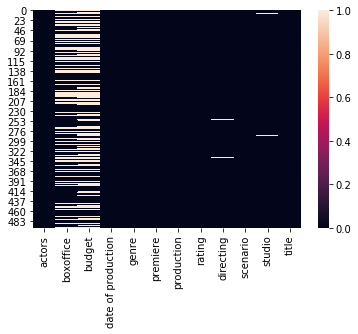

In [19]:
#checking NaN values
sns.heatmap(df.isnull())

There is a lot of NaN values in budget and boxoffice columns so we will create 1 additional DataFrame without this colmns. We will remove rows with NaN values in studio and directing.

In [12]:
#df1 will be a dataFrame without budget and boxoffice columns
df1=df.copy()

In [13]:
df1.drop(['budget','boxoffice'],axis=1,inplace=True)

In [14]:
df=df[df['directing'].isnull()==False]
df=df[df['studio'].isnull()==False]
df=df[df['budget'].isnull()==False]
df=df[df['boxoffice'].isnull()==False]
df1=df1[df1['directing'].isnull()==False]
df1=df1[df1['studio'].isnull()==False]

In [15]:
df=df.reset_index()
df1=df1.reset_index()

In [16]:
df.drop('index',axis=1,inplace=True)
df1.drop('index',axis=1,inplace=True)

Now we will transform values in some columns. In the 'boxoffice' column we will grab only the first number which is the boxoffice in the world and set a type of this value as float, in the 'budget' column we will remove a dollar sign and also set a type as a float, values in the 'premiere' column will be a datetime objects, in the 'production', 'directing', 'scenario' and 'studio' columns we will have lists of strings instead of one string and we will set a type of rating values as float. Let's define functions in order to do that.

In [17]:
#functions to clean data
def clean_boxoffice(value):
    value= value.split('na')[0].split('$')[1]
    
    for i in range(1):
        try:
            value=value.split('w')[0]
        except:
            continue
    
    return ''.join(value.split())

def clean_scenario(value):
    #changing string into list
    lst=value.split('/')   
    length=len(lst)
    if lst[length-1]=='więcej...':
        del lst[length-1]
    elif lst[length-1]=='Więcej...':
        del lst[length-1]
    
    return lst

def clean_prod(value):
    return value.split(', ')

def clean_studio(value):
    if ' '.join(value).split()[-1]=='Więcej...':
        return ' '.join(value).split()[:-1]
    else:
        return ' '.join(value).split()

def miesiac_ang(miesiac):
    if miesiac=='stycznia' or miesiac=='styczeń':
        return 'January'
    if miesiac=='lutego' or miesiac=='luty':
        return 'February'
    if miesiac=='marca' or miesiac=='marzec':
        return 'March'
    if miesiac=='kwietnia' or miesiac=='kwiecień':
        return 'April'
    if miesiac=='maja' or miesiac=='maj':
        return 'May'
    if miesiac=='czerwca' or miesiac=='czerwiec':
        return 'June'
    if miesiac=='lipca' or miesiac=='lipiec':
        return 'July'
    if miesiac=='sierpnia' or miesiac=='sierpień':
        return 'August'
    if miesiac=='września' or miesiac=='wrzesień':
        return 'September'
    if miesiac=='października' or miesiac=='październik':
        return 'October'
    if miesiac=='listopada' or miesiac=='listopad':
        return 'November'
    if miesiac=='grudnia' or miesiac=='grudzień':
        return 'December'
    
def translating_date(date):
    lst=date.split()
    if len(lst)==3:
        lst[1]=miesiac_ang(date.split()[1])
        return ' '.join(lst)
    else:
        lst[0]=miesiac_ang(date.split()[0])
        return '1 '+' '.join(lst)

def transform_rating(value):
    return '.'.join(value.split(','))

Transforming df

In [18]:
#cleaning 'boxoffice' and 'budget' column
df['boxoffice']=df['boxoffice'].apply(clean_boxoffice)
df['boxoffice']=df['boxoffice'].apply(int)
df['budget']=df['budget'].apply(clean_boxoffice)
df['budget']=df['budget'].apply(float)
df['rating']=df['rating'].apply(transform_rating)
df['date of production']=df['date of production'].apply(float)
df['rating']=df['rating'].apply(float)


#cleaning 'scenario', 'production' and 'directing' column
df['scenario']=df['scenario'].apply(clean_scenario)
df['directing']=df['directing'].apply(clean_scenario)
df['production']=df['production'].apply(clean_scenario)
df['studio']=df['studio'].apply(clean_scenario)

#changing 'premiere' column into datetime object
df['premiere']=df['premiere'].apply(translating_date)
for i in range(df['rating'].count()):
    df['premiere'][i]=datetime.strptime(df['premiere'][i],'%d %B %Y')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Transforming df1

In [19]:
df1['rating']=df1['rating'].apply(transform_rating)
df1['date of production']=df1['date of production'].apply(float)
df1['rating']=df1['rating'].apply(float)

#cleaning 'scenario', 'production' ,'studio' and 'directing' column
df1['scenario']=df1['scenario'].apply(clean_scenario)
df1['directing']=df1['directing'].apply(clean_scenario)
df1['production']=df1['production'].apply(clean_scenario)
df1['studio']=df1['studio'].apply(clean_scenario)

#changing 'premiera' column into datetime object
df1['premiere']=df1['premiere'].apply(translating_date)
for i in range(df1['rating'].count()):
    df1['premiere'][i]=datetime.strptime(df1['premiere'][i],'%d %B %Y')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now we will create additional columns: 'num of famous actors and actresses', 'num of famous directors' and 'num of famous screenwriters' representing number of famous actors etc. In order to do that we will create at first lists of famous actors, directors and screenwriters, that will be persons with the highest ratings at filmweb.pl.

In [65]:
df

,actors,boxoffice,budget,date of production,premiere,production,rating,directing,scenario,studio,title
0,"[Marlon Wayans, Kali Hawk, Fred Willard, Mike ...",22227514,5000000.0,2016.0,2016-01-28 00:00:00,[USA],3.8,[Michael Tiddes],"[Rick Alvarez, Marlon Wayans]","[Baby Way Productions, IM Global]",Pięćdziesiąt twarzy Blacka
1,"[Kristanna Loken, Ben Kingsley, Will Sanderson...",3650275,25000000.0,2005.0,2005-10-23 00:00:00,"[Niemcy, USA]",3.8,[Uwe Boll],[Guinevere Turner],"[Boll Kino Beteiligungs GmbH & Co. KG, Herold ...",BloodRayne
2,"[Nicolas Cage, Chad Michael Murray, Nicky Whel...",19682924,16000000.0,2014.0,2014-10-02 00:00:00,[USA],3.8,[Vic Armstrong],"[Paul Lalonde, John Patus]",[Stoney Lake Entertainment],Czasy ostateczne: Pozostawieni
3,"[Danielle Panabaker, Matt Bush, David Koechner...",8493728,5000000.0,2012.0,2012-05-11 00:00:00,[USA],3.7,[John Gulager],"[Patrick Melton, Marcus Dunstan, więcej...]",[Dimension Films],Pirania 3DD
4,"[Jamie Kennedy, Alan Cumming, Traylor Howard, ...",57552641,84000000.0,2005.0,2005-02-11 00:00:00,"[Niemcy, USA]",3.6,[Lawrence Guterman],[Lance Khazei],"[Dark Horse Entertainment, Kumar Mobiliengesel...",Dziedzic maski
5,"[Christian Slater, Tara Reid, Stephen Dorff, D...",10442808,20000000.0,2005.0,2005-01-28 00:00:00,"[Kanada, Niemcy, USA]",3.4,[Uwe Boll],"[Elan Mastai, Peter Scheerer, więcej...]","[AITD Productions, Boll Kino Beteiligungs GmbH...",Alone in the Dark: Wyspa cienia
6,"[Justin Chatwin, Yun-Fat Chow, Emmy Rossum, Ja...",57497699,45000000.0,2009.0,2009-03-10 00:00:00,"[Hongkong, USA, Wielka Brytania]",3.2,[James Wong],[Ben Ramsey],[Twentieth Century Fox Film Corporation],Dragonball: Ewolucja
7,"[Patrick Fabian, Ashley Bell, Iris Bahr, Louis...",67738090,1800000.0,2010.0,2010-06-24 00:00:00,"[Francja, USA]",4.9,[Daniel Stamm],"[Huck Botko, Andrew Gurland]",[Strike Entertainment],Ostatni egzorcyzm
8,"[Jenn Proske, Matt Lanter, Diedrich Bader, Chr...",80547866,20000000.0,2010.0,2010-08-18 00:00:00,[USA],4.9,"[Jason Friedberg, Aaron Seltzer]","[Jason Friedberg, Aaron Seltzer]","[Regency Enterprises, Road Rebel]",Wampiry i świry
9,"[Steve Harris, Jennifer Carpenter, Columbus Sh...",41319906,12000000.0,2008.0,2008-10-10 00:00:00,[USA],4.9,[John Erick Dowdle],"[John Erick Dowdle, Drew Dowdle]",[Screen Gems],Kwarantanna


In [20]:
def get_famous_actors(link):
    r=requests.get(link)
    soup=bs(r.content)

    actors_info=soup.find(class_='page__container rankingTypeSection__container')
    actors_rows=actors_info.find_all(class_='rankingTypePerson__header')

    for row in actors_rows:
        famous_actors_list.append(row.get_text())
    


In [21]:
def get_famous_actress(link):
    r=requests.get(link)
    soup=bs(r.content)

    actors_info=soup.find(class_='page__container rankingTypeSection__container')
    actors_rows=actors_info.find_all(class_='rankingTypePerson__header')

    for row in actors_rows:
        famous_actress_list.append(row.get_text())
    


In [22]:
def get_famous_directors(link):
    r=requests.get(link)
    soup=bs(r.content)

    actors_info=soup.find(class_='page__container rankingTypeSection__container')
    actors_rows=actors_info.find_all(class_='rankingTypePerson__header')

    for row in actors_rows:
        famous_directors_list.append(row.get_text())
    


In [23]:
def get_famous_screenwriters(link):
    r=requests.get(link)
    soup=bs(r.content)

    actors_info=soup.find(class_='page__container rankingTypeSection__container')
    actors_rows=actors_info.find_all(class_='rankingTypePerson__header')

    for row in actors_rows:
        famous_screenwriters_list.append(row.get_text())
    


In [24]:
#creating list of famous actors
famous_actors_list=[]
link='https://www.filmweb.pl/ranking/person/actors/male'
r=requests.get(link)
soup=bs(r.content)
pages=soup.find(class_='pagination__list').find_all('li')

for i in range(5):
    try:
        link=pages[i].a['href']
        base_link='https://www.filmweb.pl'
        link=base_link+link
    except:
        get_famous_actors(link)
        continue

    get_famous_actors(link)

for j in range(3):
    link='https://www.filmweb.pl/ranking/person/actors/male?page={}'.format(8+5*j)
    r=requests.get(link)
    soup=bs(r.content)
    pages=soup.find(class_='pagination__list').find_all('li')

    for i in range(5):
        try:
            link=pages[i+2].a['href']
            base_link='https://www.filmweb.pl'
            link=base_link+link
        except:
            link='https://www.filmweb.pl/ranking/person/actors/male?page={}'.format(8+5*j)

        get_famous_actors(link)

In [26]:
#creating list of famous actresses
famous_actress_list=[]
link='https://www.filmweb.pl/ranking/person/actors/female'
r=requests.get(link)
soup=bs(r.content)
pages=soup.find(class_='pagination__list').find_all('li')

for i in range(5):
    try:
        link=pages[i].a['href']
        base_link='https://www.filmweb.pl'
        link=base_link+link
        print(link)
    except:
        get_famous_actress(link)
        print(link)
        continue

    get_famous_actress(link)

for j in range(2):
    link='https://www.filmweb.pl/ranking/person/actors/female?page={}'.format(8+5*j)
    r=requests.get(link)
    soup=bs(r.content)
    pages=soup.find(class_='pagination__list').find_all('li')

    for i in range(5):
        try:
            link=pages[i+2].a['href']
            base_link='https://www.filmweb.pl'
            link=base_link+link
            print(link)
        except:
            link='https://www.filmweb.pl/ranking/person/actors/female?page={}'.format(8+5*j)
            print(link)

        get_famous_actress(link)

https://www.filmweb.pl/ranking/person/actors/female
https://www.filmweb.pl/ranking/person/actors/female?page=2
https://www.filmweb.pl/ranking/person/actors/female?page=3
https://www.filmweb.pl/ranking/person/actors/female?page=4
https://www.filmweb.pl/ranking/person/actors/female?page=5
https://www.filmweb.pl/ranking/person/actors/female?page=6
https://www.filmweb.pl/ranking/person/actors/female?page=7
https://www.filmweb.pl/ranking/person/actors/female?page=8
https://www.filmweb.pl/ranking/person/actors/female?page=9
https://www.filmweb.pl/ranking/person/actors/female?page=10
https://www.filmweb.pl/ranking/person/actors/female?page=11
https://www.filmweb.pl/ranking/person/actors/female?page=12
https://www.filmweb.pl/ranking/person/actors/female?page=13
https://www.filmweb.pl/ranking/person/actors/female?page=14
https://www.filmweb.pl/ranking/person/actors/female?page=15


In [27]:
#creating list of famous directors
famous_directors_list=[]
link='https://www.filmweb.pl/ranking/person/director'
r=requests.get(link)
soup=bs(r.content)
pages=soup.find(class_='pagination__list').find_all('li')

for i in range(5):
    try:
        link=pages[i].a['href']
        base_link='https://www.filmweb.pl'
        link=base_link+link
        print(link)
    except:
        get_famous_directors(link)
        print(link)
        continue

    get_famous_directors(link)


link='https://www.filmweb.pl/ranking/person/director?page=5'
r=requests.get(link)
soup=bs(r.content)
pages=soup.find(class_='pagination__list').find_all('li')

for i in range(2):
    try:
        link=pages[i+5].a['href']
        base_link='https://www.filmweb.pl'
        link=base_link+link
        print(link)
    except:
        link='https://www.filmweb.pl/ranking/person/director?page=5'
        print(link)

    get_famous_directors(link)

https://www.filmweb.pl/ranking/person/director
https://www.filmweb.pl/ranking/person/director?page=2
https://www.filmweb.pl/ranking/person/director?page=3
https://www.filmweb.pl/ranking/person/director?page=4
https://www.filmweb.pl/ranking/person/director?page=5
https://www.filmweb.pl/ranking/person/director?page=6
https://www.filmweb.pl/ranking/person/director?page=7


In [28]:
#creating list of famous screenwriters
famous_screenwriters_list=[]
link='https://www.filmweb.pl/ranking/person/screenwriter'
r=requests.get(link)
soup=bs(r.content)
pages=soup.find(class_='pagination__list').find_all('li')

for i in range(5):
    try:
        link=pages[i].a['href']
        base_link='https://www.filmweb.pl'
        link=base_link+link
        print(link)
    except:
        get_famous_screenwriters(link)
        print(link)
        continue

    get_famous_screenwriters(link)


for j in range(3):
    link='https://www.filmweb.pl/ranking/person/screenwriter?page={}'.format(8+5*j)
    r=requests.get(link)
    soup=bs(r.content)
    pages=soup.find(class_='pagination__list').find_all('li')

    for i in range(5):
        try:
            link=pages[i+2].a['href']
            base_link='https://www.filmweb.pl'
            link=base_link+link
            print(link)
        except:
            link='https://www.filmweb.pl/ranking/person/screenwriter?page={}'.format(8+5*j)
            print(link)

        get_famous_screenwriters(link)

https://www.filmweb.pl/ranking/person/screenwriter
https://www.filmweb.pl/ranking/person/screenwriter?page=2
https://www.filmweb.pl/ranking/person/screenwriter?page=3
https://www.filmweb.pl/ranking/person/screenwriter?page=4
https://www.filmweb.pl/ranking/person/screenwriter?page=5
https://www.filmweb.pl/ranking/person/screenwriter?page=6
https://www.filmweb.pl/ranking/person/screenwriter?page=7
https://www.filmweb.pl/ranking/person/screenwriter?page=8
https://www.filmweb.pl/ranking/person/screenwriter?page=9
https://www.filmweb.pl/ranking/person/screenwriter?page=10
https://www.filmweb.pl/ranking/person/screenwriter?page=11
https://www.filmweb.pl/ranking/person/screenwriter?page=12
https://www.filmweb.pl/ranking/person/screenwriter?page=13
https://www.filmweb.pl/ranking/person/screenwriter?page=14
https://www.filmweb.pl/ranking/person/screenwriter?page=15
https://www.filmweb.pl/ranking/person/screenwriter?page=16
https://www.filmweb.pl/ranking/person/screenwriter?page=17
https://www.f

In [29]:
famous_actors_actress_list=famous_actors_list + famous_actress_list
len(famous_actors_actress_list)

875

Creating a columns.

In [31]:
df['num of famous actors and actresses']=0
df['num of famous directors']=0
df['num of famous screenwriters']=0

In [40]:
for i in range(df['rating'].count()):
    for j in range(10):
        try:
            if df['actors'][i][j] in famous_actors_actress_list:
                df['num of famous actors and actresses'][i]+=1
        except:
            continue
            
for i in range(df['rating'].count()):
    for j in range(3):
        try:
            if df['directing'][i][j] in famous_directors_list:
                df['num of famous directors'][i]+=1
        except:
            continue
            
for i in range(df['rating'].count()):
    for j in range(3):
        try:
            if df['scenario'][i][j] in famous_screenwriters_list:
                df['num of famous screenwriters'][i]+=1
        except:
            continue

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
df1['num of famous actors and actresses']=0
df1['num of famous directors']=0
df1['num of famous screenwriters']=0

In [45]:
for i in range(df1['rating'].count()):
    for j in range(10):
        try:
            if df1['actors'][i][j] in famous_actors_actress_list:
                df1['num of famous actors and actresses'][i]+=1
        except:
            continue
            
for i in range(df1['rating'].count()):
    for j in range(3):
        try:
            if df1['directing'][i][j] in famous_directors_list:
                df1['num of famous directors'][i]+=1
        except:
            continue
            
for i in range(df1['rating'].count()):
    for j in range(3):
        try:
            if df1['scenario'][i][j] in famous_screenwriters_list:
                df1['num of famous screenwriters'][i]+=1
        except:
            continue

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
df

,actors,boxoffice,budget,date of production,genre,premiere,production,rating,directing,scenario,studio,title,num of famous actors and actresses,num of famous directors,num of famous screenwriters
0,"[Marlon Wayans, Kali Hawk, Fred Willard, Mike ...",22227514,5000000.0,2016.0,Komedia,2016-01-28 00:00:00,[USA],3.8,[Michael Tiddes],"[Rick Alvarez, Marlon Wayans]","[Baby Way Productions, IM Global]",Pięćdziesiąt twarzy Blacka,1,0,0
1,"[Kristanna Loken, Ben Kingsley, Will Sanderson...",3650275,25000000.0,2005.0,Fantasy/Horror/Akcja,2005-10-23 00:00:00,"[Niemcy, USA]",3.8,[Uwe Boll],[Guinevere Turner],"[Boll Kino Beteiligungs GmbH & Co. KG, Herold ...",BloodRayne,3,0,0
2,"[Nicolas Cage, Chad Michael Murray, Nicky Whel...",19682924,16000000.0,2014.0,Thriller/Akcja/Sci-Fi,2014-10-02 00:00:00,[USA],3.8,[Vic Armstrong],"[Paul Lalonde, John Patus]",[Stoney Lake Entertainment],Czasy ostateczne: Pozostawieni,0,0,0
3,"[Danielle Panabaker, Matt Bush, David Koechner...",8493728,5000000.0,2012.0,Horror/Komedia,2012-05-11 00:00:00,[USA],3.7,[John Gulager],"[Patrick Melton, Marcus Dunstan, więcej...]",[Dimension Films],Pirania 3DD,0,0,0
4,"[Jamie Kennedy, Alan Cumming, Traylor Howard, ...",57552641,84000000.0,2005.0,Fantasy/Komedia/Przygodowy,2005-02-11 00:00:00,"[Niemcy, USA]",3.6,[Lawrence Guterman],[Lance Khazei],"[Dark Horse Entertainment, Kumar Mobiliengesel...",Dziedzic maski,0,0,0
5,"[Christian Slater, Tara Reid, Stephen Dorff, D...",10442808,20000000.0,2005.0,Horror/Akcja,2005-01-28 00:00:00,"[Kanada, Niemcy, USA]",3.4,[Uwe Boll],"[Elan Mastai, Peter Scheerer, więcej...]","[AITD Productions, Boll Kino Beteiligungs GmbH...",Alone in the Dark: Wyspa cienia,0,0,0
6,"[Justin Chatwin, Yun-Fat Chow, Emmy Rossum, Ja...",57497699,45000000.0,2009.0,Fantasy/Przygodowy,2009-03-10 00:00:00,"[Hongkong, USA, Wielka Brytania]",3.2,[James Wong],[Ben Ramsey],[Twentieth Century Fox Film Corporation],Dragonball: Ewolucja,2,0,0
7,"[Patrick Fabian, Ashley Bell, Iris Bahr, Louis...",67738090,1800000.0,2010.0,Dramat/Horror/Dokumentalizowany,2010-06-24 00:00:00,"[Francja, USA]",4.9,[Daniel Stamm],"[Huck Botko, Andrew Gurland]",[Strike Entertainment],Ostatni egzorcyzm,0,0,0
8,"[Jenn Proske, Matt Lanter, Diedrich Bader, Chr...",80547866,20000000.0,2010.0,Komedia,2010-08-18 00:00:00,[USA],4.9,"[Jason Friedberg, Aaron Seltzer]","[Jason Friedberg, Aaron Seltzer]","[Regency Enterprises, Road Rebel]",Wampiry i świry,1,0,0
9,"[Steve Harris, Jennifer Carpenter, Columbus Sh...",41319906,12000000.0,2008.0,Horror/Sci-Fi,2008-10-10 00:00:00,[USA],4.9,[John Erick Dowdle],"[John Erick Dowdle, Drew Dowdle]",[Screen Gems],Kwarantanna,2,0,0


Now we will ceate columns for each film genre and country where the movie was produced.

In [48]:
df=pd.get_dummies(df, columns=['genre'])
df1=pd.get_dummies(df1, columns=['genre'])

In [49]:
lst_of_countries=[]
for i in range(df['rating'].count()):
    for j in range(15):
        try:
            if df['production'][i][j] not in lst_of_countries:
                lst_of_countries.append(df['production'][i][j])
        except:
            continue

In [50]:
lst_of_countries

['USA',
 'Niemcy',
 'Kanada',
 'Hongkong',
 'Wielka Brytania',
 'Francja',
 'Rosja',
 'Irlandia',
 'Japonia',
 'Wenezuela',
 'Hiszpania',
 'Słowacja',
 'Tunezja',
 'Włochy',
 'Bułgaria',
 'Szwecja',
 'Australia',
 'Malta',
 'Austria',
 'Węgry',
 'Chiny',
 'Tajwan',
 'Samoa',
 'Dania',
 'Meksyk',
 'Czechy',
 'Zjednoczone Emiraty Arabskie',
 'Nowa Zelandia',
 'Liban',
 'Polska',
 'RFN',
 'Brazylia',
 'RPA',
 'Singapur',
 'Tajlandia',
 'Egipt',
 'Indonezja',
 'Kenia',
 'Jordania',
 'Arabia Saudyjska',
 'Korea Południowa',
 'Indie']

In [51]:
for i in range(len(lst_of_countries)):
    df['prod_{}'.format(lst_of_countries[i])]=0

In [52]:
for i in range(df['rating'].count()):
    for j in range(15):
        try:
            country=df['production'][i][j]
            df['prod_{}'.format(country)][i]+=1
        except:
            continue

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [53]:
lst_of_countries=[]
for i in range(df1['rating'].count()):
    for j in range(15):
        try:
            if df1['production'][i][j] not in lst_of_countries:
                lst_of_countries.append(df1['production'][i][j])
        except:
            continue

In [91]:
for i in range(len(lst_of_countries)):
    df1['prod_{}'.format(lst_of_countries[i])]=0

In [54]:
for i in range(df1['rating'].count()):
    for j in range(15):
        try:
            country=df1['production'][i][j]
            df1['prod_{}'.format(country)][i]+=1
        except:
            continue

In [55]:
df

,actors,boxoffice,budget,date of production,premiere,production,rating,directing,scenario,studio,...,prod_RPA,prod_Singapur,prod_Tajlandia,prod_Egipt,prod_Indonezja,prod_Kenia,prod_Jordania,prod_Arabia Saudyjska,prod_Korea Południowa,prod_Indie
0,"[Marlon Wayans, Kali Hawk, Fred Willard, Mike ...",22227514,5000000.0,2016.0,2016-01-28 00:00:00,[USA],3.8,[Michael Tiddes],"[Rick Alvarez, Marlon Wayans]","[Baby Way Productions, IM Global]",...,0,0,0,0,0,0,0,0,0,0
1,"[Kristanna Loken, Ben Kingsley, Will Sanderson...",3650275,25000000.0,2005.0,2005-10-23 00:00:00,"[Niemcy, USA]",3.8,[Uwe Boll],[Guinevere Turner],"[Boll Kino Beteiligungs GmbH & Co. KG, Herold ...",...,0,0,0,0,0,0,0,0,0,0
2,"[Nicolas Cage, Chad Michael Murray, Nicky Whel...",19682924,16000000.0,2014.0,2014-10-02 00:00:00,[USA],3.8,[Vic Armstrong],"[Paul Lalonde, John Patus]",[Stoney Lake Entertainment],...,0,0,0,0,0,0,0,0,0,0
3,"[Danielle Panabaker, Matt Bush, David Koechner...",8493728,5000000.0,2012.0,2012-05-11 00:00:00,[USA],3.7,[John Gulager],"[Patrick Melton, Marcus Dunstan, więcej...]",[Dimension Films],...,0,0,0,0,0,0,0,0,0,0
4,"[Jamie Kennedy, Alan Cumming, Traylor Howard, ...",57552641,84000000.0,2005.0,2005-02-11 00:00:00,"[Niemcy, USA]",3.6,[Lawrence Guterman],[Lance Khazei],"[Dark Horse Entertainment, Kumar Mobiliengesel...",...,0,0,0,0,0,0,0,0,0,0
5,"[Christian Slater, Tara Reid, Stephen Dorff, D...",10442808,20000000.0,2005.0,2005-01-28 00:00:00,"[Kanada, Niemcy, USA]",3.4,[Uwe Boll],"[Elan Mastai, Peter Scheerer, więcej...]","[AITD Productions, Boll Kino Beteiligungs GmbH...",...,0,0,0,0,0,0,0,0,0,0
6,"[Justin Chatwin, Yun-Fat Chow, Emmy Rossum, Ja...",57497699,45000000.0,2009.0,2009-03-10 00:00:00,"[Hongkong, USA, Wielka Brytania]",3.2,[James Wong],[Ben Ramsey],[Twentieth Century Fox Film Corporation],...,0,0,0,0,0,0,0,0,0,0
7,"[Patrick Fabian, Ashley Bell, Iris Bahr, Louis...",67738090,1800000.0,2010.0,2010-06-24 00:00:00,"[Francja, USA]",4.9,[Daniel Stamm],"[Huck Botko, Andrew Gurland]",[Strike Entertainment],...,0,0,0,0,0,0,0,0,0,0
8,"[Jenn Proske, Matt Lanter, Diedrich Bader, Chr...",80547866,20000000.0,2010.0,2010-08-18 00:00:00,[USA],4.9,"[Jason Friedberg, Aaron Seltzer]","[Jason Friedberg, Aaron Seltzer]","[Regency Enterprises, Road Rebel]",...,0,0,0,0,0,0,0,0,0,0
9,"[Steve Harris, Jennifer Carpenter, Columbus Sh...",41319906,12000000.0,2008.0,2008-10-10 00:00:00,[USA],4.9,[John Erick Dowdle],"[John Erick Dowdle, Drew Dowdle]",[Screen Gems],...,0,0,0,0,0,0,0,0,0,0


Saving our data as csv file.

In [93]:
df.to_csv('filmweb_data')
df1.to_csv('filmweb_data2')

## Exploratory data analysis

In [9]:
df=pd.read_csv('filmweb_data')
df1=pd.read_csv('filmweb_data2')

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [71]:
df['production'][1]

"['Niemcy', 'USA']"

After loading data from file we have strings instead of lists so we will define function which will transform them into lists again.

In [11]:
#function which transform a string into a list (for 'production' and 'studio' columns)
def string_to_list(x):
    x= x.split('[')[1].split(']')[0].split("'")
    for i in range(len(x)):
        try:
            if x[i]==', ':
                x.remove(', ')
        except:
            continue
    x=x[1:-1]
    return x

In [12]:
df['production']=df['production'].apply(string_to_list)
df1['production']=df1['production'].apply(string_to_list)

df1['studio']=df1['studio'].apply(string_to_list)
df['studio']=df['studio'].apply(string_to_list)

Let's create a new column 'revenue' and check how correlation matrix looks like.

In [13]:
df['revenue']=df['boxoffice']/df['budget']
df1['revenue']=df['boxoffice']/df['budget']

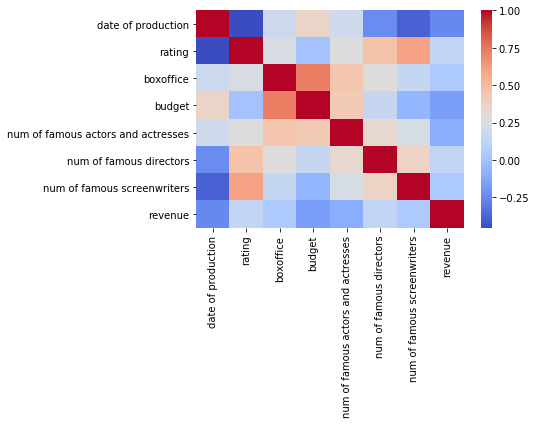

In [105]:
sns.heatmap(df[['date of production','rating','boxoffice','budget','num of famous actors and actresses',
                 'num of famous directors','num of famous screenwriters','revenue']].corr(), cmap='coolwarm')

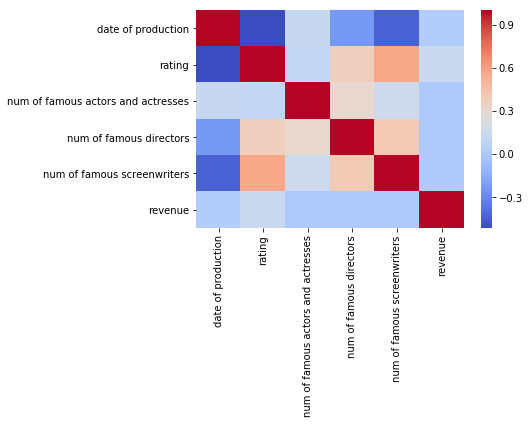

In [108]:
sns.heatmap(df1[['date of production','rating','num of famous actors and actresses',
                 'num of famous directors','num of famous screenwriters','revenue']].corr(), cmap='coolwarm')

We can see that the biggest impact on a rating has a number of famous directors and screenwriters, on the otehr hand a boxoffice and a budget have one of the least impacts so we will not use them for building a model. Now we will check how a mean rating and a revenue of a movies depends on a different variables.

In [110]:
lst=[]
for i in range(df1['rating'].count()):
    for j in range(5):
        try:
            country=df1['production'][i][j]
            if country not in lst:
                lst.append(country)
        except:
            continue
len(lst)

48

In [112]:
countries_mean_rating=pd.DataFrame([[0,0] for i in range(len(lst))])
for i in range(len(lst)):
    lst2=[] #list with rating
    for j in range(df1['rating'].count()):
        try:
            if lst[i] in df1['production'][j]:
                lst2.append(df1.loc[j]['rating'])
        except:
            continue
    countries_mean_rating.loc[i]=[lst[i], np.mean(lst2)]

In [113]:
countries_mean_rating=countries_mean_rating.rename(columns={0:'country', 1:'mean rating'})

In [114]:
#creating a column 'num_of_movies' which represents how many movies was produced by a given country
countries_mean_rating['num_of_movies']=0

In [115]:
for i in range(len(lst)):
    country=lst[i]
    num_of_movies=0
    for j in range(df1['rating'].count()):
        if country in df1['production'][j]:
            num_of_movies+=1
    countries_mean_rating['num_of_movies'][i]=num_of_movies

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [116]:
countries_mean_rating.sort_values(by='mean rating',axis=0, ascending=False)

,country,mean rating,num_of_movies
44,Liban,8.300000,1
43,Brazylia,8.250000,2
45,RPA,8.200000,1
47,Estonia,8.100000,1
46,Gruzja,8.100000,1
39,RFN,8.066667,3
41,ZSRR,8.000000,3
42,Szwajcaria,7.900000,1
40,Czechosłowacja,7.900000,1
27,Włochy,7.684615,13


We see that countries which have the biggest mean rating have also very little number of movies produced, from among 8 countries which have produced the most movies, Italy has the biggest mean rating.

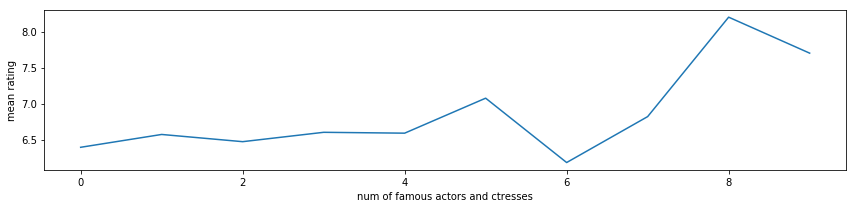

In [139]:
fig,axes = plt.subplots(figsize=(12,3))
axes.plot(df1.groupby('num of famous actors and actresses').mean()['rating'])
axes.set_ylabel('mean rating')
axes.set_xlabel('num of famous actors and ctresses')
plt.tight_layout()

A number of famous actors doesn't seem to have a big impact on a rating, only movies with 8 and 9 famous actors has significantly bigger mean rating.

In [135]:
pd.DataFrame(df1.groupby('num of famous directors').mean().sort_values('rating',ascending=False)['rating'])

,rating
num of famous directors,
2,7.366667
1,7.359060
0,6.199405


In [136]:
pd.DataFrame(df1.groupby('num of famous screenwriters').mean().sort_values('rating',ascending=False)['rating'])

,rating
num of famous screenwriters,
2,7.993750
1,7.592437
0,5.963863


We can see that if we have at least one famous screenwriter or director then a mean rating is much bigger, but there is no difference if we have one or two famous screenwriters or directors.

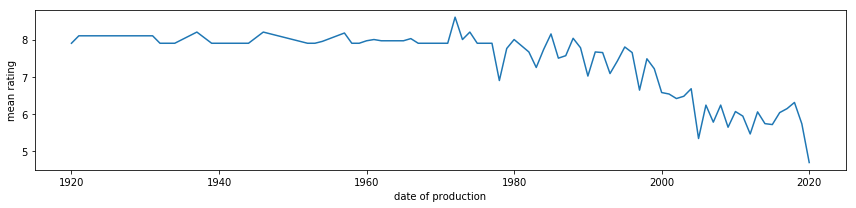

In [140]:
fig,axes=plt.subplots(figsize=(12,3))
axes.plot(df1.groupby('date of production').mean()['rating'])
axes.set_xlabel('date of production')
axes.set_ylabel('mean rating')
plt.tight_layout()

The movies produced after around 1980 start to getting smaller mean rate and the biggest drop is between 2019 and 2020. Let's check a number of movies with rating above 7.5 which was produced before and after 1980.

In [24]:
print('Number of movies with rating above 7.5 produced after 1980: {}'
      .format(df1[(df1['date of production']>1980)&(df1['rating']>7.5)]['rating'].count()))

Number of movies with rating above 7.5 produced after 1980: 115


In [26]:
print('Number of movies with rating above 7.5 produced before 1980: {}'
      .format(df1[(df1['date of production']<1980)&(df1['rating']>7.5)]['rating'].count()))

Number of movies with rating above 7.5 produced before 1980: 64


We can see that even though a mean rating of movies produced after 1980 start to getting smaller, a number of movies with a rating above 7.5 is almost two times bigger. Now let's see what are the movies with the biggest revenue and how it depends on a number of famous actors, screenwriters and directors.

In [63]:
df[['title','revenue']].sort_values(by='revenue',ascending=False)

,title,revenue
103,El mariachi,291.704000
107,Mad Max,153.846154
128,Przeminęło z wiatrem,101.169872
75,Świt żywych trupów,84.615385
206,Psychoza,61.961938
90,Cztery wesela i pogrzeb,55.841098
150,Ojciec chrzestny,40.844402
129,Absolwent,38.315102
118,Okno na podwórze,36.888916
153,Lot nad kukułczym gniazdem,36.327092


In [145]:
pd.DataFrame(df.groupby('num of famous actors and actresses').mean().sort_values('revenue',ascending=False)['revenue'])

,revenue
num of famous actors and actresses,
0,15.139986
1,10.199413
5,9.487152
7,8.559945
8,7.825709
9,6.401505
3,5.577743
2,5.438217
4,4.430091


In [147]:
pd.DataFrame(df.groupby('num of famous directors').mean().sort_values('revenue',ascending=False)['revenue'])

,revenue
num of famous directors,
1,12.584386
0,5.845198
2,4.931307


In [148]:
pd.DataFrame(df.groupby('num of famous screenwriters').mean().sort_values('revenue',ascending=False)['revenue'])

,revenue
num of famous screenwriters,
1,10.406077
2,9.362066
0,7.377515


Now we will create some models and try to predict a rating of a movie. In order to check which one is the best we will calculate a root mean square error.

## model 1- Support Vector Regression

In [48]:
df=pd.read_csv('filmweb_data')
df1=pd.read_csv('filmweb_data2')

In [49]:
df1.drop(['Unnamed: 0','actors','premiere','production','directing','scenario','studio','title'],axis=1,inplace=True)
df.drop(['Unnamed: 0','actors','premiere','production','directing','scenario','studio','title'],axis=1,inplace=True)

In [37]:
x=df1.drop('rating',axis=1)
y=df1['rating']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [161]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train,y_train)
pred=regr.predict(x_test)

from sklearn import metrics
import numpy as np
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

RMSE: 1.0954264095022075


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## model 2- KNeighborsRegressor

In [171]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

RMSE: 1.2837328647453141


## model 3- GaussianProcessRegressor

In [172]:
from sklearn.gaussian_process import GaussianProcessRegressor
model=GaussianProcessRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

RMSE: 4.585056107616669


## model 4- DecisionTreeRegressor

In [173]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

RMSE: 1.215517582430332


We can see that the best one is Support Vector Regression. Let's try to improve it with GridSearch.

In [174]:
from sklearn.model_selection import GridSearchCV

In [179]:
param={'C':[0.001,0.01,0.1,1,10,100,1000],'epsilon':[0.001,0.01,0.1,1,10,100,1000]}
grid = GridSearchCV(svm.SVR(),param,refit=True,verbose=3)

In [180]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV] C=0.001, epsilon=0.001 ..........................................
[CV]  C=0.001, epsilon=0.001, score=-0.006508677600420398, total=   0.0s
[CV] C=0.001, epsilon=0.001 ..........................................
[CV]  C=0.001, epsilon=0.001, score=-0.09563283122506028, total=   0.0s
[CV] C=0.001, epsilon=0.001 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' 

[CV]  C=0.001, epsilon=0.001, score=0.011333977929421035, total=   0.0s
[CV] C=0.001, epsilon=0.01 ...........................................
[CV]  C=0.001, epsilon=0.01, score=-0.005558005733177884, total=   0.0s
[CV] C=0.001, epsilon=0.01 ...........................................
[CV]  C=0.001, epsilon=0.01, score=-0.09626073798501311, total=   0.0s
[CV] C=0.001, epsilon=0.01 ...........................................
[CV] . C=0.001, epsilon=0.01, score=0.01207310969782105, total=   0.0s
[CV] C=0.001, epsilon=0.1 ............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] . C=0.001, epsilon=0.1, score=0.011559535400308407, total=   0.0s
[CV] C=0.001, epsilon=0.1 ............................................
[CV] . C=0.001, epsilon=0.1, score=-0.14510395059299452, total=   0.0s
[CV] C=0.001, epsilon=0.1 ............................................
[CV] . C=0.001, epsilon=0.1, score=0.022479378856593013, total=   0.0s
[CV] C=0.001, epsilon=1 ..............................................
[CV] ... C=0.001, epsilon=1, score=-0.00985093685956051, total=   0.0s
[CV] C=0.001, epsilon=1 ..............................................
[CV] ... C=0.001, epsilon=1, score=-0.09967516526277298, total=   0.0s
[CV] C=0.001, epsilon=1 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] ... C=0.001, epsilon=1, score=0.008862222604231751, total=   0.0s
[CV] C=0.001, epsilon=10 .............................................
[CV] ... C=0.001, epsilon=10, score=-0.2393003918865615, total=   0.0s
[CV] C=0.001, epsilon=10 .............................................
[CV] .. C=0.001, epsilon=10, score=-0.13235578281442306, total=   0.0s
[CV] C=0.001, epsilon=10 .............................................
[CV] .. C=0.001, epsilon=10, score=-0.39859095377725473, total=   0.0s
[CV] C=0.001, epsilon=100 ............................................
[CV] .. C=0.001, epsilon=100, score=-0.2393003918865615, total=   0.0s
[CV] C=0.001, epsilon=100 ............................................
[CV] .. C=0.001, epsilon=100, score=-0.1323557828144255, total=   0.0s
[CV] C=0.001, epsilon=100 ............................................
[CV] . C=0.001, epsilon=100, score=-0.39859095377725473, total=   0.0s
[CV] C=0.001, epsilon=1000 ...........................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni


[CV] C=0.01, epsilon=0.001 ...........................................
[CV]  C=0.01, epsilon=0.001, score=-0.037964875170513945, total=   0.0s
[CV] C=0.01, epsilon=0.001 ...........................................
[CV] . C=0.01, epsilon=0.001, score=0.13370626335371538, total=   0.0s
[CV] C=0.01, epsilon=0.01 ............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .. C=0.01, epsilon=0.01, score=0.11408883032446637, total=   0.0s
[CV] C=0.01, epsilon=0.01 ............................................
[CV]  C=0.01, epsilon=0.01, score=-0.038556259166518725, total=   0.0s
[CV] C=0.01, epsilon=0.01 ............................................
[CV] .. C=0.01, epsilon=0.01, score=0.13370626335371538, total=   0.0s
[CV] C=0.01, epsilon=0.1 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ... C=0.01, epsilon=0.1, score=0.12262482610036196, total=   0.0s
[CV] C=0.01, epsilon=0.1 .............................................
[CV] .. C=0.01, epsilon=0.1, score=-0.04772423683756055, total=   0.0s
[CV] C=0.01, epsilon=0.1 .............................................
[CV] ... C=0.01, epsilon=0.1, score=0.14110667054792214, total=   0.0s
[CV] C=0.01, epsilon=1 ...............................................
[CV] ..... C=0.01, epsilon=1, score=0.08536511955092074, total=   0.0s
[CV] C=0.01, epsilon=1 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] ... C=0.01, epsilon=1, score=-0.036105285101229345, total=   0.0s
[CV] C=0.01, epsilon=1 ...............................................
[CV] ..... C=0.01, epsilon=1, score=0.10361397802075534, total=   0.0s
[CV] C=0.01, epsilon=10 ..............................................
[CV] .... C=0.01, epsilon=10, score=-0.2393003918865615, total=   0.0s
[CV] C=0.01, epsilon=10 ..............................................
[CV] ... C=0.01, epsilon=10, score=-0.13235578281442306, total=   0.0s
[CV] C=0.01, epsilon=10 ..............................................
[CV] ... C=0.01, epsilon=10, score=-0.39859095377725473, total=   0.0s
[CV] C=0.01, epsilon=100 .............................................
[CV] ... C=0.01, epsilon=100, score=-0.2393003918865615, total=   0.0s
[CV] C=0.01, epsilon=100 .............................................
[CV] ... C=0.01, epsilon=100, score=-0.1323557828144255, total=   0.0s
[CV] C=0.01, epsilon=100 .............................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] .. C=0.1, epsilon=0.001, score=0.34085343123222467, total=   0.0s
[CV] C=0.1, epsilon=0.001 ............................................
[CV] ... C=0.1, epsilon=0.001, score=0.3385888020255704, total=   0.0s
[CV] C=0.1, epsilon=0.001 ............................................
[CV] .. C=0.1, epsilon=0.001, score=0.29894175256442646, total=   0.0s
[CV] C=0.1, epsilon=0.01 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ... C=0.1, epsilon=0.01, score=0.34119236891976057, total=   0.0s
[CV] C=0.1, epsilon=0.01 .............................................
[CV] ... C=0.1, epsilon=0.01, score=0.34125723914732137, total=   0.0s
[CV] C=0.1, epsilon=0.01 .............................................
[CV] .... C=0.1, epsilon=0.01, score=0.2974753634947531, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ..... C=0.1, epsilon=0.1, score=0.3414942023754902, total=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=0.1, epsilon=0.1 ..............................................
[CV] .... C=0.1, epsilon=0.1, score=0.32803831693339813, total=   0.0s
[CV] C=0.1, epsilon=0.1 ..............................................
[CV] ...... C=0.1, epsilon=0.1, score=0.296447040487953, total=   0.0s
[CV] C=0.1, epsilon=1 ................................................
[CV] ....... C=0.1, epsilon=1, score=0.2805148517223137, total=   0.0s
[CV] C=0.1, epsilon=1 ................................................
[CV] ....... C=0.1, epsilon=1, score=0.3444448840093967, total=   0.0s
[CV] C=0.1, epsilon=1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] ....... C=0.1, epsilon=1, score=0.1780399717936266, total=   0.0s
[CV] C=0.1, epsilon=10 ...............................................
[CV] ..... C=0.1, epsilon=10, score=-0.2393003918865615, total=   0.0s
[CV] C=0.1, epsilon=10 ...............................................
[CV] .... C=0.1, epsilon=10, score=-0.13235578281442306, total=   0.0s
[CV] C=0.1, epsilon=10 ...............................................
[CV] .... C=0.1, epsilon=10, score=-0.39859095377725473, total=   0.0s
[CV] C=0.1, epsilon=100 ..............................................
[CV] .... C=0.1, epsilon=100, score=-0.2393003918865615, total=   0.0s
[CV] C=0.1, epsilon=100 ..............................................
[CV] .... C=0.1, epsilon=100, score=-0.1323557828144255, total=   0.0s
[CV] C=0.1, epsilon=100 ..............................................
[CV] ... C=0.1, epsilon=100, score=-0.39859095377725473, total=   0.0s
[CV] C=0.1, epsilon=1000 .............................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni


[CV] C=1, epsilon=0.001 ..............................................
[CV] ..... C=1, epsilon=0.001, score=0.4246427672040528, total=   0.0s
[CV] C=1, epsilon=0.001 ..............................................
[CV] ..... C=1, epsilon=0.001, score=0.3270870522657595, total=   0.0s
[CV] C=1, epsilon=0.01 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ..... C=1, epsilon=0.01, score=0.39274062781787644, total=   0.0s
[CV] C=1, epsilon=0.01 ...............................................
[CV] ...... C=1, epsilon=0.01, score=0.4254941579628172, total=   0.0s
[CV] C=1, epsilon=0.01 ...............................................
[CV] ..... C=1, epsilon=0.01, score=0.32495089931681753, total=   0.0s
[CV] C=1, epsilon=0.1 ................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ........ C=1, epsilon=0.1, score=0.383718489565516, total=   0.0s
[CV] C=1, epsilon=0.1 ................................................
[CV] ....... C=1, epsilon=0.1, score=0.4272449597810606, total=   0.0s
[CV] C=1, epsilon=0.1 ................................................
[CV] ...... C=1, epsilon=0.1, score=0.30846155728145763, total=   0.0s
[CV] C=1, epsilon=1 ..................................................
[CV] ........ C=1, epsilon=1, score=0.36969533011570826, total=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni


[CV] C=1, epsilon=1 ..................................................
[CV] ........ C=1, epsilon=1, score=0.41268541253374547, total=   0.0s
[CV] C=1, epsilon=1 ..................................................
[CV] ........ C=1, epsilon=1, score=0.23697646361009905, total=   0.0s
[CV] C=1, epsilon=10 .................................................
[CV] ....... C=1, epsilon=10, score=-0.2393003918865615, total=   0.0s
[CV] C=1, epsilon=10 .................................................
[CV] ...... C=1, epsilon=10, score=-0.13235578281442306, total=   0.0s
[CV] C=1, epsilon=10 .................................................
[CV] ...... C=1, epsilon=10, score=-0.39859095377725473, total=   0.0s
[CV] C=1, epsilon=100 ................................................
[CV] ...... C=1, epsilon=100, score=-0.2393003918865615, total=   0.0s
[CV] C=1, epsilon=100 ................................................
[CV] ...... C=1, epsilon=100, score=-0.1323557828144255, total=   0.0s
[CV] 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] C=1, epsilon=1000 ...............................................
[CV] .... C=1, epsilon=1000, score=-0.39859095377725473, total=   0.0s
[CV] C=10, epsilon=0.001 .............................................
[CV] ..... C=10, epsilon=0.001, score=0.504736123085251, total=   0.0s
[CV] C=10, epsilon=0.001 .............................................
[CV] ..... C=10, epsilon=0.001, score=0.554134901929869, total=   0.0s
[CV] C=10, epsilon=0.001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ... C=10, epsilon=0.001, score=0.47474316913736514, total=   0.0s
[CV] C=10, epsilon=0.01 ..............................................
[CV] ..... C=10, epsilon=0.01, score=0.5055810087661401, total=   0.0s
[CV] C=10, epsilon=0.01 ..............................................
[CV] ..... C=10, epsilon=0.01, score=0.5553964408635219, total=   0.0s
[CV] C=10, epsilon=0.01 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ..... C=10, epsilon=0.01, score=0.4741402482591931, total=   0.0s
[CV] C=10, epsilon=0.1 ...............................................
[CV] ...... C=10, epsilon=0.1, score=0.5079629669443364, total=   0.0s
[CV] C=10, epsilon=0.1 ...............................................
[CV] ...... C=10, epsilon=0.1, score=0.5559356201475947, total=   0.0s
[CV] C=10, epsilon=0.1 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ..... C=10, epsilon=0.1, score=0.46161851843905266, total=   0.0s
[CV] C=10, epsilon=1 .................................................
[CV] ....... C=10, epsilon=1, score=0.45472435124082233, total=   0.0s
[CV] C=10, epsilon=1 .................................................
[CV] ....... C=10, epsilon=1, score=0.49816906926934124, total=   0.0s
[CV] C=10, epsilon=1 .................................................
[CV] ........ C=10, epsilon=1, score=0.3699847717027254, total=   0.0s
[CV] C=10, epsilon=10 ................................................
[CV] ...... C=10, epsilon=10, score=-0.2393003918865615, total=   0.0s
[CV] C=10, epsilon=10 ................................................
[CV] ..... C=10, epsilon=10, score=-0.13235578281442306, total=   0.0s
[CV] C=10, epsilon=10 ................................................
[CV] ..... C=10, epsilon=10, score=-0.39859095377725473, total=   0.0s
[CV] C=10, epsilon=100 ...............................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] .... C=10, epsilon=1000, score=-0.2393003918865615, total=   0.0s
[CV] C=10, epsilon=1000 ..............................................
[CV] ... C=10, epsilon=1000, score=-0.13235578281442884, total=   0.0s
[CV] C=10, epsilon=1000 ..............................................
[CV] ... C=10, epsilon=1000, score=-0.39859095377725473, total=   0.0s
[CV] C=100, epsilon=0.001 ............................................
[CV] .. C=100, epsilon=0.001, score=0.45250970012755465, total=   0.0s
[CV] C=100, epsilon=0.001 ............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] .... C=100, epsilon=0.001, score=0.505818383956571, total=   0.0s
[CV] C=100, epsilon=0.001 ............................................
[CV] .... C=100, epsilon=0.001, score=0.590757796054745, total=   0.0s
[CV] C=100, epsilon=0.01 .............................................
[CV] ... C=100, epsilon=0.01, score=0.45382233179664677, total=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=100, epsilon=0.01 .............................................
[CV] .... C=100, epsilon=0.01, score=0.5088045193894759, total=   0.0s
[CV] C=100, epsilon=0.01 .............................................
[CV] .... C=100, epsilon=0.01, score=0.5914631008839992, total=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



[CV] C=100, epsilon=0.1 ..............................................
[CV] .... C=100, epsilon=0.1, score=0.46140355941931144, total=   0.0s
[CV] C=100, epsilon=0.1 ..............................................
[CV] ..... C=100, epsilon=0.1, score=0.5104897507781634, total=   0.0s
[CV] C=100, epsilon=0.1 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ..... C=100, epsilon=0.1, score=0.5992435123349603, total=   0.0s
[CV] C=100, epsilon=1 ................................................
[CV] ....... C=100, epsilon=1, score=0.5202024382468277, total=   0.0s
[CV] C=100, epsilon=1 ................................................
[CV] ....... C=100, epsilon=1, score=0.5207172797813617, total=   0.0s
[CV] C=100, epsilon=1 ................................................
[CV] ....... C=100, epsilon=1, score=0.5080475380406644, total=   0.0s
[CV] C=100, epsilon=10 ...............................................
[CV] ..... C=100, epsilon=10, score=-0.2393003918865615, total=   0.0s
[CV] C=100, epsilon=10 ...............................................
[CV] .... C=100, epsilon=10, score=-0.13235578281442306, total=   0.0s
[CV] C=100, epsilon=10 ...............................................
[CV] .... C=100, epsilon=10, score=-0.39859095377725473, total=   0.0s
[CV] C=100, epsilon=100 ..............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] .... C=100, epsilon=100, score=-0.2393003918865615, total=   0.0s
[CV] C=100, epsilon=100 ..............................................
[CV] .... C=100, epsilon=100, score=-0.1323557828144255, total=   0.0s
[CV] C=100, epsilon=100 ..............................................
[CV] ... C=100, epsilon=100, score=-0.39859095377725473, total=   0.0s
[CV] C=100, epsilon=1000 .............................................
[CV] ... C=100, epsilon=1000, score=-0.2393003918865615, total=   0.0s
[CV] C=100, epsilon=1000 .............................................
[CV] .. C=100, epsilon=1000, score=-0.13235578281442884, total=   0.0s
[CV] C=100, epsilon=1000 .............................................
[CV] .. C=100, epsilon=1000, score=-0.39859095377725473, total=   0.0s
[CV] C=1000, epsilon=0.001 ...........................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] .. C=1000, epsilon=0.001, score=0.3600781364335207, total=   0.1s
[CV] C=1000, epsilon=0.001 ...........................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] . C=1000, epsilon=0.001, score=0.44914448051143774, total=   0.1s
[CV] C=1000, epsilon=0.001 ...........................................
[CV] . C=1000, epsilon=0.001, score=0.42250999933197897, total=   0.1s
[CV] C=1000, epsilon=0.01 ............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .. C=1000, epsilon=0.01, score=0.36610657859494844, total=   0.0s
[CV] C=1000, epsilon=0.01 ............................................
[CV] ... C=1000, epsilon=0.01, score=0.4548842930880467, total=   0.1s
[CV] C=1000, epsilon=0.01 ............................................
[CV] ... C=1000, epsilon=0.01, score=0.4260325673987121, total=   0.0s
[CV] C=1000, epsilon=0.1 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ... C=1000, epsilon=0.1, score=0.40811894437481644, total=   0.0s
[CV] C=1000, epsilon=0.1 .............................................
[CV] ... C=1000, epsilon=0.1, score=0.48189553540256636, total=   0.0s
[CV] C=1000, epsilon=0.1 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .... C=1000, epsilon=0.1, score=0.4448939959232544, total=   0.0s
[CV] C=1000, epsilon=1 ...............................................
[CV] ...... C=1000, epsilon=1, score=0.5190841942977433, total=   0.0s
[CV] C=1000, epsilon=1 ...............................................
[CV] ...... C=1000, epsilon=1, score=0.5269197249875976, total=   0.0s
[CV] C=1000, epsilon=1 ...............................................
[CV] ..... C=1000, epsilon=1, score=0.49615310459557266, total=   0.0s
[CV] C=1000, epsilon=10 ..............................................
[CV] .... C=1000, epsilon=10, score=-0.2393003918865615, total=   0.0s
[CV] C=1000, epsilon=10 ..............................................
[CV] ... C=1000, epsilon=10, score=-0.13235578281442306, total=   0.0s
[CV] C=1000, epsilon=10 ..............................................
[CV] ... C=1000, epsilon=10, score=-0.39859095377725473, total=   0.0s
[CV] C=1000, epsilon=100 .............................................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[CV] . C=1000, epsilon=1000, score=-0.13235578281442884, total=   0.0s
[CV] C=1000, epsilon=1000 ............................................
[CV] . C=1000, epsilon=1000, score=-0.39859095377725473, total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    7.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [181]:
grid.best_params_

{'C': 100, 'epsilon': 0.1}

In [182]:
pred=grid.predict(x_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

RMSE: 0.9837080528473684


Now let's try classification models. In order to do that, we will round up rating values so a type of them is int.

In [50]:
df1['rating'].value_counts()

5.9    94
7.9    93
6.9    93
8.1    46
4.7    24
4.9    24
4.8    22
8.2    17
8.3    12
4.6    12
4.5    10
3.8     6
8.4     5
3.5     4
3.3     3
4.4     3
3.6     3
3.9     3
8.0     3
8.7     2
8.5     2
8.6     2
3.7     2
3.2     1
3.4     1
8.8     1
Name: rating, dtype: int64

In [51]:
for i in range(df1['rating'].count()):
    if 3<=df1['rating'][i]<=3.4:
        df1['rating'][i]=3
    elif 3.5<=df1['rating'][i]<=4.4:
        df1['rating'][i]=4
    elif 4.5<=df1['rating'][i]<=5.4:
        df1['rating'][i]=5
    elif 5.5<=df1['rating'][i]<=6.4:
        df1['rating'][i]=6
    elif 6.5<=df1['rating'][i]<7.4:
        df1['rating'][i]=7
    elif 7.5<=df1['rating'][i]<=8.4:
        df1['rating'][i]=8
    else:
        df1['rating'][i]=9

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_

In [52]:
df1['rating'].value_counts()

8.0    176
6.0     94
7.0     93
5.0     92
4.0     21
9.0      7
3.0      5
Name: rating, dtype: int64

In [53]:
x=df1.drop('rating',axis=1)
y=df1['rating']

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

## model 1- KNN

In [214]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
for i in range(50):
    model=KNeighborsClassifier(n_neighbors=i+1)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    error.append(np.mean(np.array(pred)!=np.array(y_test)))


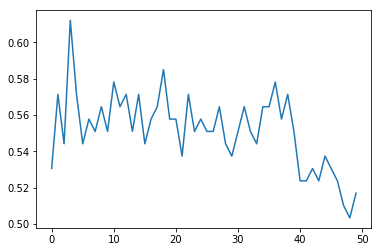

In [215]:
plt.plot(error)

In [216]:
model=KNeighborsClassifier(n_neighbors=49)
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  0  2  0  0  0]
 [ 0  0  5  4  0  0  0]
 [ 0  0 19  6  2  1  0]
 [ 0  0  5 13  2  2  0]
 [ 0  0  8 12  4  5  0]
 [ 0  0  3 10  5 37  0]
 [ 0  0  0  0  1  1  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         9
         5.0       0.47      0.68      0.56        28
         6.0       0.28      0.59      0.38        22
         7.0       0.29      0.14      0.19        29
         8.0       0.80      0.67      0.73        55
         9.0       0.00      0.00      0.00         2

   micro avg       0.50      0.50      0.50       147
   macro avg       0.26      0.30      0.26       147
weighted avg       0.49      0.50      0.47       147



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## model 2- SVC

In [54]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  1  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0 14  0  1  2  0]
 [ 0  0 23  0  4  4  0]
 [ 0  0 14  0  3 12  0]
 [ 0  0 10  0  6 44  0]
 [ 0  0  0  0  0  3  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         6
         5.0       0.21      0.82      0.33        17
         6.0       0.00      0.00      0.00        31
         7.0       0.21      0.10      0.14        29
         8.0       0.68      0.73      0.70        60
         9.0       0.00      0.00      0.00         3

   micro avg       0.41      0.41      0.41       147
   macro avg       0.16      0.24      0.17       147
weighted avg       0.34      0.41      0.35       147



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted

## model 3- SGDC

In [219]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  0  2  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0 28  0  0  0]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0 29  0  0  0]
 [ 0  0  0 55  0  0  0]
 [ 0  0  0  2  0  0  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         9
         5.0       0.00      0.00      0.00        28
         6.0       0.15      1.00      0.26        22
         7.0       0.00      0.00      0.00        29
         8.0       0.00      0.00      0.00        55
         9.0       0.00      0.00      0.00         2

   micro avg       0.15      0.15      0.15       147
   macro avg       0.02      0.14      0.04       147
weighted avg       0.02      0.15      0.04       147



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precis

## model 4- GaussianNB

In [14]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  2  0  0  0  0]
 [ 1  3  3  0  0  0  0]
 [ 3 10  6  4  2  0  0]
 [ 5  2  7 10  3  1  1]
 [ 1  0  7  8  6  2  1]
 [ 2  2  7 17 10 15  2]
 [ 0  0  1  1  0  1  1]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.18      0.43      0.25         7
         5.0       0.18      0.24      0.21        25
         6.0       0.25      0.34      0.29        29
         7.0       0.29      0.24      0.26        25
         8.0       0.79      0.27      0.41        55
         9.0       0.20      0.25      0.22         4

   micro avg       0.28      0.28      0.28       147
   macro avg       0.27      0.25      0.23       147
weighted avg       0.44      0.28      0.31       147



## model 5- Multinomial NB

In [15]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  1  0  0  1  0]
 [ 0  0  6  0  0  1  0]
 [ 0  0 16  1  2  6  0]
 [ 0  0 11  6  3  9  0]
 [ 0  0  3  3  6 13  0]
 [ 0  1  2  0  2 50  0]
 [ 0  0  0  0  0  4  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7
         5.0       0.41      0.64      0.50        25
         6.0       0.60      0.21      0.31        29
         7.0       0.46      0.24      0.32        25
         8.0       0.60      0.91      0.72        55
         9.0       0.00      0.00      0.00         4

   micro avg       0.53      0.53      0.53       147
   macro avg       0.30      0.29      0.26       147
weighted avg       0.49      0.53      0.47       147



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 ## model 6- Complement NB

In [16]:
from sklearn.naive_bayes import ComplementNB
model=ComplementNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  2  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 1  0 17  2  4  1  0]
 [ 1  0 11  7  4  6  0]
 [ 0  0  3  3  7 12  0]
 [ 1  1  3  3  4 42  1]
 [ 0  0  0  0  0  4  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7
         5.0       0.40      0.68      0.50        25
         6.0       0.47      0.24      0.32        29
         7.0       0.37      0.28      0.32        25
         8.0       0.65      0.76      0.70        55
         9.0       0.00      0.00      0.00         4

   micro avg       0.50      0.50      0.50       147
   macro avg       0.27      0.28      0.26       147
weighted avg       0.46      0.50      0.46       147



## model 7- Bernoulli NB

In [17]:
from sklearn.naive_bayes import BernoulliNB
model=ComplementNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  2  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 1  0 17  2  4  1  0]
 [ 1  0 11  7  4  6  0]
 [ 0  0  3  3  7 12  0]
 [ 1  1  3  3  4 42  1]
 [ 0  0  0  0  0  4  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7
         5.0       0.40      0.68      0.50        25
         6.0       0.47      0.24      0.32        29
         7.0       0.37      0.28      0.32        25
         8.0       0.65      0.76      0.70        55
         9.0       0.00      0.00      0.00         4

   micro avg       0.50      0.50      0.50       147
   macro avg       0.27      0.28      0.26       147
weighted avg       0.46      0.50      0.46       147



## model 7- Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  2  0  0  0  0]
 [ 0  1  5  1  0  0  0]
 [ 0  3 13  5  3  1  0]
 [ 0  1 12 11  3  2  0]
 [ 0  0  2  7  6 10  0]
 [ 0  0  3  6  4 40  2]
 [ 0  0  0  0  1  3  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.20      0.14      0.17         7
         5.0       0.35      0.52      0.42        25
         6.0       0.37      0.38      0.37        29
         7.0       0.35      0.24      0.29        25
         8.0       0.71      0.73      0.72        55
         9.0       0.00      0.00      0.00         4

   micro avg       0.48      0.48      0.48       147
   macro avg       0.28      0.29      0.28       147
weighted avg       0.47      0.48      0.47       147



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## model 8- Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  2  0  0  0  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0 17  2  4  2  0]
 [ 0  0 11  8  5  5  0]
 [ 0  0  1  3  9 12  0]
 [ 0  0  3  4  6 42  0]
 [ 0  0  0  0  0  4  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7
         5.0       0.41      0.68      0.52        25
         6.0       0.47      0.28      0.35        29
         7.0       0.38      0.36      0.37        25
         8.0       0.65      0.76      0.70        55
         9.0       0.00      0.00      0.00         4

   micro avg       0.52      0.52      0.52       147
   macro avg       0.27      0.30      0.28       147
weighted avg       0.47      0.52      0.48       147



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\me

## model 9- Decission Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  2  0  0  0  0]
 [ 0  1  5  1  0  0  0]
 [ 0  5 12  4  4  0  0]
 [ 0  2 13  6  5  3  0]
 [ 0  0  4  5 11  5  0]
 [ 1  0  4  5  5 39  1]
 [ 0  0  0  0  1  3  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.12      0.14      0.13         7
         5.0       0.30      0.48      0.37        25
         6.0       0.29      0.21      0.24        29
         7.0       0.42      0.44      0.43        25
         8.0       0.78      0.71      0.74        55
         9.0       0.00      0.00      0.00         4

   micro avg       0.47      0.47      0.47       147
   macro avg       0.27      0.28      0.27       147
weighted avg       0.48      0.47      0.47       147



## model 10- Gaussian Process

In [25]:
from sklearn.gaussian_process import GaussianProcessClassifier
model=GaussianProcessClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0  0  1  1  0  0  0]
 [ 0  1  5  1  0  0  0]
 [ 0  2 13  6  3  1  0]
 [ 0  0 15  7  5  2  0]
 [ 0  0  9  5  8  3  0]
 [ 0  0 11  3  6 33  2]
 [ 0  0  1  0  0  3  0]]
              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.33      0.14      0.20         7
         5.0       0.24      0.52      0.33        25
         6.0       0.30      0.24      0.27        29
         7.0       0.36      0.32      0.34        25
         8.0       0.79      0.60      0.68        55
         9.0       0.00      0.00      0.00         4

   micro avg       0.42      0.42      0.42       147
   macro avg       0.29      0.26      0.26       147
weighted avg       0.47      0.42      0.43       147



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


It's quite diffucult to decide which model is the best. The logistic regression has the highest average f1- score but some of the other models are better for predicting some ratings, for example for predicting rating 4 the highest f1- score has the GaussianNB model which amounts 0.25.